numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



<AxesSubplot: >

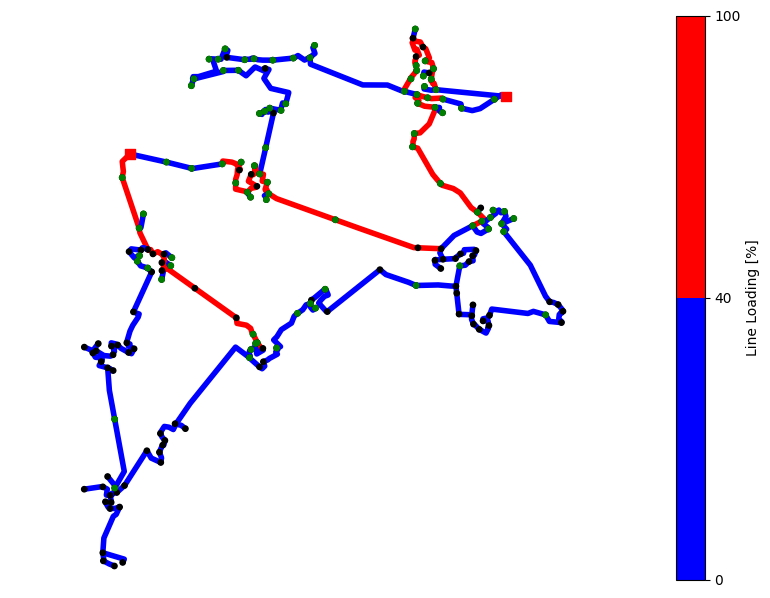

In [1]:
import pandapower as pp
import pandapower.networks as nw
import pandas as pd
import matplotlib.pyplot as plt
import os
import pandapower.plotting as plot

try:
    import seaborn
    colors = seaborn.color_palette()
except:
    colors = ["b", "g", "r", "c", "y"]
%matplotlib inline
#Import an example network:
net = nw.mv_oberrhein()

net.bus.loc[net.bus.index[:90], "zone"] = "A"
net.bus.loc[net.bus.index[90:], "zone"] = "B"

zone_busses = net.bus[net.bus.zone=="A"].index
lc = plot.create_bus_collection(net, net.bus.index,size=80,color="black", zorder=1)
lcl = plot.create_bus_collection(net,zone_busses,size=80,color="g", zorder=2)

pp.runpp(net)
cmap_list=[((0, 40), "blue"), ((40,100), "red")]
cmap, norm = plot.cmap_discrete(cmap_list)
bc = plot.create_line_collection(net, net.line.index,cmap=cmap , norm=norm , zorder=0,linewidth =4)

sc = plot.create_bus_collection(net, net.ext_grid.bus.values, patch_type="rect", size=140, color="red", zorder=11)
plot.draw_collections([lc ,lcl , bc, sc ], figsize=(8,6))